# Multi Level Perceptron (MLP)


## MLP Classifier

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot):
    R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input 
    and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$
    and a target $y$, it can learn a **non-linear function** approximator for either classification
    or regression. It is different from logistic regression, in that between the input and the 
    output layer, there can be one or more non-linear layers, called hidden layers. See Figure 1 below;
    shows a one hidden layer MLP with scalar output.

The leftmost layer, known as the input layer, consists of a set of neurons 
$\{x_i\ \ |\ \ x_1, x_2, 
..., x_m\}$ representing the input features. Each neuron in the hidden layer transforms the 
values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$,
followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the hyperbolic 
    tan function. The output layer receives the values from the last hidden layer and 
    transforms them into output values.
The module contains the public attributes $coefs\_$ and $intercepts\_$. Attribute
$coefs\_$ is a list of weight 
matrices, where weight matrix at index $i$ represents the weights between layer $i$ and layer 
$i+1$. 
Attribute $intercepts\_$ is a list of bias vectors, where the vector at index $i$ represents the bias values
added to layer $i+1$.

The advantages of Multi-layer Perceptron are:
* Capability to learn models in real-time (on-line learning) using partial_fit.
* Capability to learn non-linear models.

The disadvantages of Multi-layer Perceptron (MLP) include:
* MLP with hidden layers have a non-convex loss function where there exists more than one local 
minimum. Therefore different random weight initializations can lead to different validation 
accuracy.
* MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, 
and iterations.
* MLP is sensitive to feature scaling.

The URL http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    provides some details how to use the scikit learn MLP classifier.

![MLP](mlp1.png)

## MLP Classifier for XOR function

In [1]:
#importing needed libraries
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

### XOR Data set

In [2]:
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]]) #2D input array with train data
y = np.array([0, 1, 1, 0]) #output vector for XOR
#check dimensions
print("X type: ", type(X), ", X dimensions: ", X.shape)
print("y type: ", type(y), ", y dimensions: ", y.shape)

X type:  <class 'numpy.ndarray'> , X dimensions:  (4, 2)
y type:  <class 'numpy.ndarray'> , y dimensions:  (4,)


### Set up and Train MLP

In [3]:
#2 neurons for the hidden layer, fully connected
#activation function: 'relu', but could be 'tanh' as well. Sigmoid function 'logistic' is not working here
#verbose = True stands for showing iteration steps
mlp = MLPClassifier(hidden_layer_sizes=(2,), verbose=True, activation='tanh', 
                    learning_rate_init = 0.08, random_state=1)
#training the model
mlp.fit(X, y)

Iteration 1, loss = 0.77009592
Iteration 2, loss = 0.72667306
Iteration 3, loss = 0.69797102
Iteration 4, loss = 0.68300456
Iteration 5, loss = 0.67812999
Iteration 6, loss = 0.67823109
Iteration 7, loss = 0.67878826
Iteration 8, loss = 0.67734066
Iteration 9, loss = 0.67324274
Iteration 10, loss = 0.66680616
Iteration 11, loss = 0.65868065
Iteration 12, loss = 0.64954436
Iteration 13, loss = 0.63996843
Iteration 14, loss = 0.63036705
Iteration 15, loss = 0.62099410
Iteration 16, loss = 0.61196789
Iteration 17, loss = 0.60331262
Iteration 18, loss = 0.59500654
Iteration 19, loss = 0.58702453
Iteration 20, loss = 0.57936334
Iteration 21, loss = 0.57204425
Iteration 22, loss = 0.56509799
Iteration 23, loss = 0.55854471
Iteration 24, loss = 0.55238196
Iteration 25, loss = 0.54658720
Iteration 26, loss = 0.54113116
Iteration 27, loss = 0.53599191
Iteration 28, loss = 0.53116089
Iteration 29, loss = 0.52663923
Iteration 30, loss = 0.52242921
Iteration 31, loss = 0.51852681
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.08, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [4]:
print('Absolute training score:', mlp.score(X, y))
print('predictions:', mlp.predict(X)) 
print('expected:', np.array([0, 1, 1, 0]))
#mlp.predict([[0.8,1.0]])

Absolute training score: 1.0
predictions: [0 1 1 0]
expected: [0 1 1 0]


### Interrogate the trained network

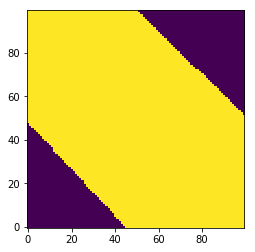

In [5]:
#Create a 2D mesh and interrogate the trained network
PITCH = 0.01
RESOLUTION = int(1/PITCH)
x = np.arange(0, 1, PITCH)
y = np.arange(0, 1, PITCH)
crds = np.meshgrid(x, y, sparse=False, indexing='ij')
flatX = np.ravel(crds[0])
flatY = np.ravel(crds[1])
test = np.column_stack((flatX,flatY))
plt.imshow(mlp.predict(test).reshape((RESOLUTION,RESOLUTION)), origin = 'lower')

## Why does this work?


![MLP](maxresdefault.jpg)

# Exercise
This exercise is about showing the powerful non-linear decision surface (or line in 2D 
problems) of a trained MLP. As seen in the XOR case a lot of classification problems cannot be solved with a 
linear classifier as the perceptron or the linear Support Vector machine (SVM). 

Please follow the following steps.
1. Use the data set in the $perceptron0.ipnb$ notebook as a basis.
2. Extend it with few samples such that it cannot be separated linearly.
3. Use a simple MLP with 2 neurons in the hidden layer, check http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    for details.
4. Use the 2D mesh grid to visualise the decision surface.
5. Extent the data set with even more difficult to separate samples and increase the number 
of hidden neurons to solve this. Again use the 2D mesh grid to visualise the results.


In [11]:
# Data
d = np.array([
[2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5, 2, 6, 4, 6, 1, 3, 1, 4],
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 5, 1, 1, 6, 4, 1]
])
 
# Labels
t = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])


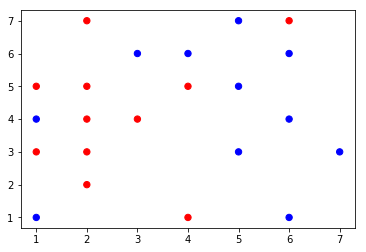

In [12]:
colormap = np.array(['r', 'b'])
plt.scatter(d[0], d[1], c=colormap[t], s=40)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(30,), verbose=True, activation='tanh', 
                    learning_rate_init = 0.2, random_state=1)
#training the model
mlp.fit(np.transpose(d), t)

Iteration 1, loss = 1.61009384
Iteration 2, loss = 2.05367010
Iteration 3, loss = 0.97457103
Iteration 4, loss = 0.90955521
Iteration 5, loss = 1.08323856
Iteration 6, loss = 0.69618210
Iteration 7, loss = 0.87236216
Iteration 8, loss = 0.93111274
Iteration 9, loss = 0.66032686
Iteration 10, loss = 0.73197740
Iteration 11, loss = 0.84105017
Iteration 12, loss = 0.68911127
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.2, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [26]:
print('Absolute training score:', mlp.score(np.transpose(d), t))
print('predictions:', mlp.predict(np.transpose(d))) 
print('expected:   ', np.array(t))

Absolute training score: 0.636363636364
predictions: [1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1]
expected:    [0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0]


In [33]:
#Create a 2D mesh and interrogate the trained network
PITCH = 0.1
x = np.arange(0, 10, PITCH)
y = np.arange(0, 10, PITCH)
crds = np.meshgrid(x, y, sparse=False, indexing='ij')
flatX = np.ravel(crds[0])
flatY = np.ravel(crds[1])
test = np.column_stack((flatX,flatY))
plt.imshow(mlp.predict(np.transpose(d)).reshape((100,100)), origin = 'lower')

ValueError: cannot reshape array of size 22 into shape (100,100)